In [14]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
%matplotlib inline

titanic_df=pd.read_csv('C:/Users/user/Jupyter_project/Practice/titanic/train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


- Passengerid : 탑승자 데이터 일련번호
- survived : 생존 여부, 0은 사망 1은 생존
- Pclass : 티켓의 선실 등급 1은 일등석, 2는 이등석, 3은 삼등석
- sex : 탑승자의 성별
- name : 탑승자의 이름
- Age : 탐승자의 나이
- sibsp : 같이 탑승한 현제자매 또는 배우자의 인원수
- parch : 같이 탑승한 부모님 혹은 어린이의 인원수
- ticket : 티켓 번호
- fare : 요금
- cabin : 선실 번호
- embarked : 중간 정착 항구 

In [15]:
print('\n ### train 데이터 정보 ### \n')
print(titanic_df.info())


 ### train 데이터 정보 ### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


- ML Algorithm에서는 string은 취급하지 않기 때문에 이를 int형으로 인코딩을 할 것이다. 그리고 object 역시 제거하여 데이터 전처리를 하고, NULL값이 발견되면 이 또한 삭제를 할 것이다.

#### NULL 컬럼들에 대한 처리

In [16]:

titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)
titanic_df['Cabin'].fillna('N',inplace=True)
titanic_df['Embarked'].fillna('N',inplace=True)

print('데이터 세트 Null 값의 갯수',titanic_df.isnull().sum().sum())

데이터 세트 Null 값의 갯수 0


In [17]:
print('데이터 세트 Null 값의 갯수',titanic_df.isnull().sum())

데이터 세트 Null 값의 갯수 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


- object 즉 구체적으로는 string 형태인 것들 가운데에서, Sex, Cabin, Embarked는 0,1,2 등 몇 개 되지 않는 범주로 분류가 이루어질 수 있는 속성을 갖고 있다. 이를 처리해주도록 하겠다.

In [18]:
print('Sex 값 분포 : \n',titanic_df['Sex'].value_counts())
print('\n\n')
print('Cabin 값 분포 : \n',titanic_df['Cabin'].value_counts())
print('\n\n')
print('Embarked 값 분포 : \n',titanic_df['Embarked'].value_counts())

Sex 값 분포 : 
 male      577
female    314
Name: Sex, dtype: int64



Cabin 값 분포 : 
 N              687
C23 C25 C27      4
G6               4
B96 B98          4
F33              3
              ... 
D45              1
E12              1
D21              1
E50              1
E31              1
Name: Cabin, Length: 148, dtype: int64



Embarked 값 분포 : 
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


- Cabin의 맨 앞 알파벳만 딱 가져와서 처리를 할 수 있도록
titanic_df['Cabin'].str[:1]을 하자.
    - N,C,N과 같이 알파벳 하나로만 분류될 수 있도록한다.
    - N은 몇개, C는 몇개, B는 몇개 이런식으로 보다 직관적으로 나타낼 수 있도록.

In [19]:
titanic_df['Cabin']=titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head(3))
titanic_df['Cabin'].value_counts()

0    N
1    C
2    N
Name: Cabin, dtype: object


N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

- 성별과 생존자 두 개의 컬럼으로 집계를 한 후 생존자에 대해 숫자를 구해본다.

In [20]:
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

- 여성의 경우 0 : 사망자는 81명, 1 : 생존자는 233명이고
- 남성의 경우 0 : 사망자는 468명, 1 : 생존자는 109명임을 알 수 있다.

- 이를 막대그래프(x축은 성별, y축은 생존자로 구분하고, data원본은 titanic_df를 취한다.)

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

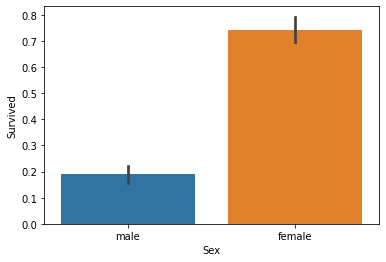

In [21]:
sns.barplot(x='Sex',y='Survived',data=titanic_df)

- hue에 컬럼을 입력하면, 원래 x축 : Pclass y축 : Survived였던 비교에서, Sex를 추가적으로 비교를 할 수 있게 해준다.

- 1번의 경우 Pclass와 Survived 사이에서의 비교이지만,

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

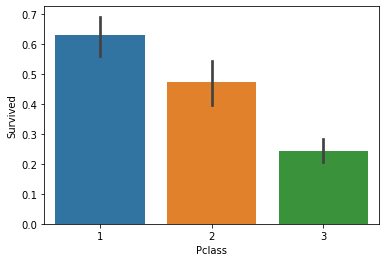

In [22]:
sns.barplot(x='Pclass',y='Survived',data=titanic_df)

- hue를 넣어줌으로써 세 컬럼 사이의 비교를 해준다. 물론, x,y에 들어가 있는 속성이 메인이고 hue는 약간 부록의 성격이 강하다.

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

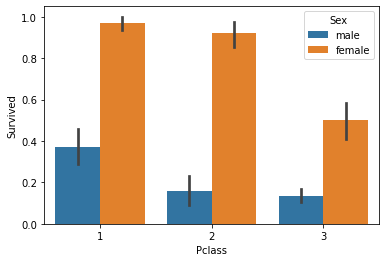

In [23]:
sns.barplot(x='Pclass',y='Survived',hue='Sex',data=titanic_df)

- 나이에 따라 처리를 달리 하기 위한 함수를 만들어준다.

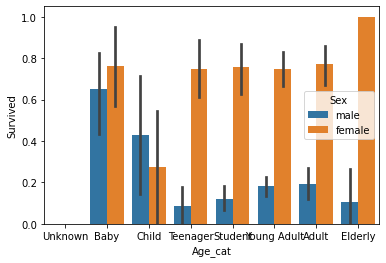

In [25]:
# # 입력 age에 따라 구분값을 반환하는 함수 설정. DataFrame의 apply lambda를 사용하겠습니다.

# def get_category(age):
#     cat=''
#     if age<=-1: cat='Unknown'
#     elif age<=5: cat='Baby'
#     elif age<=12: cat='Child'
#     elif age<=18: cat='Teenager'
#     elif age<=25: cat = 'Student'
#     elif age<=35: cat = 'Young Adult'
#     elif age<=60: cat = 'Adult'
#     else:
#         cat = 'Elderly'
#     return cat

# #막대 그래프의 크기 figure를 더 크게 설정합니다.
# #plt.figure(figsize=(10,6))

# #X축의 값을 순차적으로 표시하기 위한 설정입니다.

# group_names=['Unknown','Baby','Child','Teenager','Student','Young Adult','Adult','Elderly']


# #람다 식에 위에서 생성한 get_category() 함수를 반환 값으로 지정합니다.

# titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))

# sns.barplot(x = 'Age_cat', y = 'Survived',hue='Sex',data=titanic_df,order=group_names)
# titanic_df.drop('Age_cat',axis=1,inplace=True)
# 입력 age에 따라 구분값을 반환하는 함수 설정. DataFrame의 apply lambda식에 사용. 
def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else : cat = 'Elderly'
    
    return cat

# 막대그래프의 크기 figure를 더 크게 설정 
#plt.figure(figsize=(10,6))

#X축의 값을 순차적으로 표시하기 위한 설정 
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

# lambda 식에 위에서 생성한 get_category( ) 함수를 반환값으로 지정. 
# get_category(X)는 입력값으로 'Age' 컬럼값을 받아서 해당하는 cat 반환
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))
sns.barplot(x='Age_cat', y = 'Survived', hue='Sex', data=titanic_df, order=group_names)
titanic_df.drop('Age_cat', axis=1, inplace=True)

- 지금부터 label 인코딩 등 가공 변환을 하겠습니다.

In [26]:
from sklearn import preprocessing

def encode_features(dataDF):
    features=['Cabin','Sex','Embarked']
    
    for feature in features:
        #객체를 생성한 다음
        le = preprocessing.LabelEncoder()
        #데이터 프레임의 해당 컬럼을 학습 시키고
        le=le.fit(dataDF[feature])
        #그 학습 시킨 dataframe의 컬럼을 label값으로 transform시켜서 반환한다.
        dataDF[feature]=le.transform(dataDF[feature])
    return dataDF


titanic_df = encode_features(titanic_df)
titanic_df.head()
    

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


- 이제는 함수형으로 모든 전처리를 하도록 하겠습니다.


1) Null 처리 함수


2) 식별자 속성, 티켓 같은 불필요한 속성 제거 함수


3) 레이블 인코딩을 하는 함수 (Cabin에 대해 맨 앞 문자 하나만 가져오는 함수)

In [27]:
from sklearn.preprocessing import LabelEncoder


#Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    
    return df

# 머신러닝 알고리즘에 불필요한 속성을 제거하는 함수 입니다.

def drop_needless_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    
    return df

# 마지막으로 레이블 인코딩을 수행합니다.

def format_features(df):
    #Cabin에서 맨 앞 알파벳만 따서 덮어쓰기
    df['Cabin']=df['Cabin'].str[:1]
    
    #le 객체를 생성하여 시작
    features=['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le=le.fit(df[feature])
        df[feature]=le.transform(df[feature])
    return df


# 이제 이 세 개의 함수를 한꺼번에 호출하는 상위 함수를 만듭니다.

def transform_features(df):
    df = fillna(df)
    df = drop_needless_features(df)
    df = format_features(df)
    return df
    

#### 이제 드디어 학습과 검증이 시작됩니다.

In [28]:
#원본 데이터를 새 것으로 재로딩하고, feature 데이터 셋과 Label 데이터 셋을 추출합니다.

titanic_df=pd.read_csv('C:/Users/user/Jupyter_project/Practice/titanic/train.csv')

y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived',axis=1)


X_titanic_df = transform_features(X_titanic_df)

In [29]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_titanic_df,y_titanic_df,test_size = 0.2,random_state=11)

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#결정트리, RandomForest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성

dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf= LogisticRegression()



dt_clf.fit(X_train,y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test,dt_pred)))

rf_clf.fit(X_train,y_train)
rf_pred = rf_clf.predict(X_test)
print('RogisticRegression 정확도:{0:.4f}'.format(accuracy_score(y_test,rf_pred)))

#LogisticRegression 학습/예측 평가
lr_clf.fit(X_train,y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도:{0:.4f}'.format(accuracy_score(y_test,lr_pred)))

DecisionTreeClassifier 정확도:0.7877
RogisticRegression 정확도:0.8547
LogisticRegression 정확도:0.8492


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### 이제는 kfold를 통해 검증을 합니다.

In [40]:
from sklearn.model_selection import KFold


#알고리즘 모델과, fold 횟수를 인자로 넘긴다.
def exec_kfold(clf,folds=5):
    # 폴드 세트가 5개인 KFold 객체를 생성, 폴드 수만큼 예측 결과 저장을 위한 
    # 결과 리스트 객체를 생성합니다.
    
    kfold = KFold(n_splits=folds)
    ans=[]
    
    #KFold 교차검증을 수행합니다.
    for iter_count, (train_index,test_index) in enumerate(kfold.split(X_titanic_df)):
        
        #X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 
        #index를 생성합니다. 
        
        X_train,X_test = X_titanic_df.values[train_index],X_titanic_df.values[test_index]
        y_train,y_test = y_titanic_df.values[train_index],y_titanic_df.values[test_index]
        
        #모델에 학습을 시킵니다.
        #학습 자체는 fit으로 동일하기 떄문에 안심
        
        clf.fit(X_train,y_train)
        
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test,predictions)
        
        ans.append(accuracy)
        print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count,accuracy))
    
    mean_score = np.mean(ans)
    print("평균 정확도: {0:.4f}".format(mean_score))
    #5개 fold에서의 평균, 정확도 계산
    
        
    
# exel_kfold 호출

exec_kfold(dt_clf,folds=5)

교차 검증 0 정확도: 0.7542
교차 검증 1 정확도: 0.7809
교차 검증 2 정확도: 0.7865
교차 검증 3 정확도: 0.7697
교차 검증 4 정확도: 0.8202
평균 정확도: 0.7823


- 위에 있는 개짓거리를 cross_val_score 와 GridSearchCV를 통해 한번에 해결합니다.

In [41]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf,X_titanic_df,y_titanic_df,cv=5)
#다섯번의 교차 검증을 수행한 결과를 반환

for iter_count,accuracy in enumerate(scores):
    print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count,accuracy))

print("cross_val_score 결과 평균 정확도 : {0:.4f}".format(np.mean(scores)))

교차 검증 0 정확도: 0.7430
교차 검증 1 정확도: 0.7753
교차 검증 2 정확도: 0.7921
교차 검증 3 정확도: 0.7865
교차 검증 4 정확도: 0.8427
cross_val_score 결과 평균 정확도 : 0.7879


In [45]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2,3,5,10],
             'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]}

grid_dclf = GridSearchCV(dt_clf , param_grid=parameters , scoring='accuracy' , cv=5)
grid_dclf.fit(X_train , y_train)

print('GridSearchCV 최적 하이퍼 파라미터 :',grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행. 
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test , dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))


GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8715
